## LA County Disadvtaged Communities Data 

The data I am using comes from a mapping tool from the Strategic Growth Council. The columns are a few of the indicators to measure a population’s vulnerability to environmental pollutants that the tool uses. The rows are organized by census tracts. 

In [6]:
import pandas as pd
import geopandas as gpd 

In [13]:
# read and add file to notebook 
disadv = gpd.read_file('LA County_CalEnviro.csv')

In [14]:
# data type
type(disadv)

geopandas.geodataframe.GeoDataFrame

Applying the .head command generates the first five rows of data. 

In [17]:
# first five rows of the dataframe
disadv.head()

,OBJECTID,Tract,ZIP,Population,CIscore4,CIscoreP4,Pollution,Pollution Score,Pollution Pctl,Education,...,CES_AnyAnd_AB1550,tracttxt,HTCTop2,HTCTop,HTCTop2_and_CES_DAC,Shape__Area,Shape__Length,x,y,geometry
0,350,6059011601,92832,8430,58.3342528,94.65456379,66.02564908,8.061718638,96.57747355,36.6,...,Yes,6059011601,Yes,Yes,Yes,1164043.2999801636,4473.881317765363,,,None
1,351,6059011602,92831,5314,50.19924703,88.07362582,75.82507802,9.258226966,99.68886123,39.4,...,Yes,6059011602,No,No,No,5676727.940940857,11226.571016751655,,,None
2,353,6059086602,92801,6447,40.09818091,75.10085729,54.18795481,6.616338519,80.65961419,30.5,...,Yes,6059086602,Yes,No,Yes,1144033.5828475952,4874.110500517352,,,None
3,354,6059001103,90631,4594,42.26464242,78.4165406,58.69707076,7.16690068,89.04791537,12.6,...,Yes,6059001103,Yes,No,Yes,1343962.8108901978,5743.268098511966,,,None
4,357,6059110402,90620,5588,43.12353276,79.67725668,55.92454056,6.828375294,84.23148724,25.1,...,Yes,6059110402,Yes,No,Yes,1967185.3025665283,6486.5847558197565,,,None


Applying the .tail command generates the last five rows of data

In [18]:
# last five rows of the dataframe
disadv.tail()

,OBJECTID,Tract,ZIP,Population,CIscore4,CIscoreP4,Pollution,Pollution Score,Pollution Pctl,Education,...,CES_AnyAnd_AB1550,tracttxt,HTCTop2,HTCTop,HTCTop2_and_CES_DAC,Shape__Area,Shape__Length,x,y,geometry
1146,8006,6037404402,91702,5156,60.16073797,95.78920827,67.6103407,8.25520917,97.3490977,31.1,...,Yes,6037404402,No,No,No,3366005.127090454,8519.713589205043,,,None
1147,8028,6037183810,90042,4163,40.66599,76.096823,44.63739669,5.45021727,55.78095831,32.4,...,Yes,6037183810,Yes,Yes,Yes,455476.49839782715,3121.2237011214365,,,None
1148,8032,6037431100,91016,6758,39.69784916,74.50832073,68.86647868,8.408583368,97.88425638,16,...,Yes,6037431100,No,No,No,3015660.558052063,8020.091398159319,,,None
1149,8033,6037533603,90201,6986,62.93104397,97.04992436,61.77302569,7.542474167,93.0304916,42.6,...,Yes,6037533603,Yes,Yes,Yes,811895.6298446655,4949.116926225597,,,None
1150,8034,6037534101,90201,2358,63.31504786,97.22642461,73.95741684,9.030185907,99.39016801,46,...,Yes,6037534101,Yes,Yes,Yes,509871.7808532715,4420.126713040075,,,None


Applying the .shape command counts the number of rows and columns in your data set

In [22]:
# Count number of rows and columns?
metro.shape

(1151, 48)

The .info command provides the data type for each column. The .dtypes can also be used but .info provides more information.

In [24]:
disadv.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   OBJECTID                    1151 non-null   object  
 1   Tract                       1151 non-null   object  
 2   ZIP                         1151 non-null   object  
 3   Population                  1151 non-null   object  
 4   CIscore4                    1151 non-null   object  
 5   CIscoreP4                   1151 non-null   object  
 6   Pollution                   1151 non-null   object  
 7   Pollution Score             1151 non-null   object  
 8   Pollution Pctl              1151 non-null   object  
 9   Education                   1151 non-null   object  
 10  Education Pctl              1151 non-null   object  
 11  Linguistic Isolation        1151 non-null   object  
 12  Linguistic Isolation Pctl   1151 non-null   object  
 13  Poverty   

Using the .value_counts command to count the number of census tracts are in each city in the data

In [41]:
disadv['City'].value_counts()

Los Angeles             545
Long Beach               60
East Los Angeles         28
El Monte                 25
Glendale                 23
                       ... 
Midway City               1
Avocado Heights           1
Vernon                    1
South San Jose Hills      1
Monrovia                  1
Name: City, Length: 83, dtype: int64

Saving the tract count as a new variable to create some plots 

In [43]:
city_count = disadv['City'].value_counts()
city_count

Los Angeles             545
Long Beach               60
East Los Angeles         28
El Monte                 25
Glendale                 23
                       ... 
Midway City               1
Avocado Heights           1
Vernon                    1
South San Jose Hills      1
Monrovia                  1
Name: City, Length: 83, dtype: int64

Converting the series above into a dataframe to make it easier to read 

In [44]:
city_count = city_count.reset_index()
city_count

,index,City
0,Los Angeles,545
1,Long Beach,60
2,East Los Angeles,28
3,El Monte,25
4,Glendale,23
...,...,...
78,Midway City,1
79,Avocado Heights,1
80,Vernon,1
81,South San Jose Hills,1


Renaming columns to make them easier to understand 

In [47]:
city_count.columns = ['City', 'count']

In [48]:
city_count

,City,count
0,Los Angeles,545
1,Long Beach,60
2,East Los Angeles,28
3,El Monte,25
4,Glendale,23
...,...,...
78,Midway City,1
79,Avocado Heights,1
80,Vernon,1
81,South San Jose Hills,1


Used the .plot.bar command to make a graph that shows the number of census tracts per city in the county. Not super helpful because there are so many cities! 

<AxesSubplot: title={'center': 'Number of census tracts per city'}, xlabel='City'>

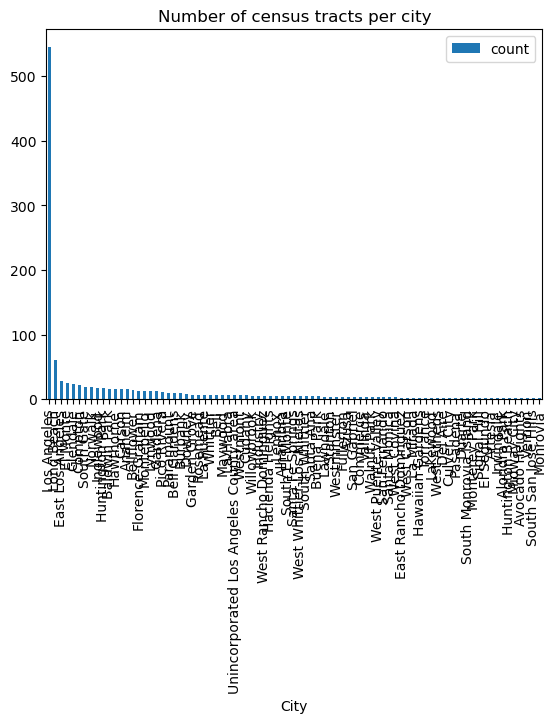

In [52]:
city_count.plot.bar(x = 'City', y = 'count', title = 'Number of census tracts per city')

Using the .head command I filtered for the first five rows, in this case the cities with the most census tracts, to make a more helpful bar graph. 

In [54]:
city_count.head()

,City,count
0,Los Angeles,545
1,Long Beach,60
2,East Los Angeles,28
3,El Monte,25
4,Glendale,23


In [55]:
city_count2 = city_count.head()
city_count2

,City,count
0,Los Angeles,545
1,Long Beach,60
2,East Los Angeles,28
3,El Monte,25
4,Glendale,23


<AxesSubplot: title={'center': 'Number of census tracts per city'}, xlabel='City'>

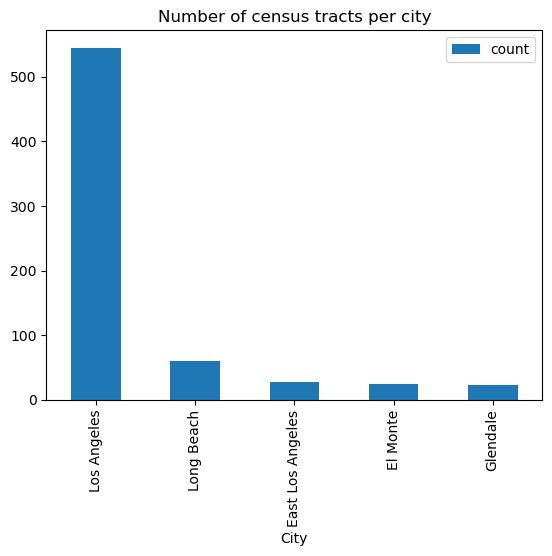

In [57]:
city_count2.plot.bar(x = 'City', y = 'count', title = 'Number of census tracts per city')